In [1]:
# Last Updated: May 30, 2023

# **Linear Regression from Scratch**

Linear regression is a statistical technique that establishes a linear relationship between independent variables and a continuous target variable. It aims to find the best-fit line that minimizes the difference between predicted and actual values. The coefficients represent the impact of each independent variable on the target variable.

In this article, we will explore two commonly employed methods for estimating the parameters of a linear regression model: the closed-form solution and the gradient descent algorithm. We will then provide code implementations in Python for both methods, and apply them to an example dataset. Finally, we will discuss the scikit-learn library for linear regression.

## Closed Form

The closed-form solution for linear regression provides a direct mathematical formula to estimate the coefficients of the linear regression model. It minimizes the sum of squared residuals and allows for an exact solution without the need for iterative optimization algorithms.

The cost function for linear regression is defined as the sum of squared differences (SSE) between the observed target variable values and the predicted target variable values. Mathematically, it can be represented as:

$$J = \sum_{1}^{N}{(Y_i - \hat{Y_i})^2}$$

where $Y_i$represents the observed target variable value and $\hat{Y_i}$ denotes the predicted target variable value.

$$\hat{Y_i} = X_i \theta$$

To find the optimal values of the model parameters that minimize the squared error, we need to compute the derivative of the cost function with respect to the model parameters and set it to zero:

$$ \frac{\partial{J}}{\partial{\theta}} = 0$$

The derivative of the cost function with respect to the model parameters can be computed using calculus, and the resulting equation can be solved for the optimal values of the model parameters using algebra. The closed-form solution is as follows:

$$\theta = (X^T X)^{-1} X^T Y$$

Where the vector $\theta$ represents the optimal values of the model parameters. The matrix $X$ consists of input features and has a shape of (n, p+1), where n refers to the number of training samples, and p represents the number of input features. The inclusion of +1 accounts for the bias term. The vector $Y$ denotes the target variable values and has a shape of (n,). The matrix $X^T$ corresponds to the transpose of matrix $X$. Additionally, the notation $()^{-1}$ signifies the inverse of a matrix.

To see the steps of derivation, you can check [this document](https://colab.research.google.com/drive/1SUeQY-XqJsgWlMII8zOTD4ZOHhLm-trz).

The following function performs linear regression using the closed-form solution. The function takes input feature matrix X and target values y. A bias column of ones is added to X, and then the closed-form solution for linear regression is computed by applying matrix operations. Finally, the learned parameters theta, including the bias term, are returned as the output of the function.

In [2]:
import numpy as np

def linear_regression_closed_form(X, y):
    """
    Perform linear regression using the closed-form solution.

    Parameters:
        X (numpy.ndarray): The input feature matrix of shape (n, p), 
                           where n is the number of training examples
                           and p is the number of features.
        y (numpy.ndarray): The target values of shape (n, 1)

    Returns:
        numpy.ndarray: The learned parameters theta of shape (p+1, 1), including the bias term.

    """
    # Add a bias column of ones to the input features
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Compute the closed-form solution of linear regression
    theta = np.linalg.inv(X.T @ X) @ (X.T @ y)

    return theta


Obtaining a closed-form solution for linear regression is not always possible due to certain conditions. One reason is when the matrix involved in the equation is non-invertible or singular. This can occur when the input features are linearly dependent or when the number of features exceeds the number of data points.

To overcome these limitations, gradient descent is commonly used as an iterative optimization algorithm for linear regression. Gradient descent operates by iteratively adjusting the parameters in the direction of steepest descent of the cost function. It starts with an initial guess for the parameters and updates them based on the gradients of the cost function with respect to the parameters. By taking steps proportional to the negative gradient, gradient descent aims to reach the global or local minimum of the cost function.

## Gradient Descent

Gradient descent is an optimization algorithm used in linear regression to find the optimal parameters that minimize the prediction error. It starts by initializing the parameters and iteratively updates them using the gradients of the cost function. The cost function measures the error between predicted and actual values. By repeatedly adjusting the parameters in the direction of steepest descent, guided by the gradients, gradient descent helps the model converge to the optimal parameter values. This process continues until a stopping criterion is met. The final parameter values represent the optimal solution for the linear regression model, allowing accurate predictions to be made on new data.

The objective of gradient descent is to minimize the sum of squared errors, which represents the squared difference between observed values and the corresponding values predicted by the model. The cost function for a single observation can be expressed as the squared error, defined as follows:

$$J = (y - x \theta)^2$$

where $y$ is the observed value, $x$ is the vector of features, and $\theta$ is the vector of parameters. 

We want to find the gradient of the cost function with respect to each of our parameters ($\theta_0$, $\theta_1$, ..., $\theta_D$) in order to update them effectively. The gradient provides us with the direction and magnitude of the steepest ascent or descent for each parameter.

To calculate the gradient, we take the partial derivative of the cost function J with respect to each parameter:

$$
\frac{\partial J}{\partial \theta} = 
\begin{bmatrix}
\frac{\partial J}{\partial \theta_0} \\
\frac{\partial J}{\partial \theta_1} \\
\vdots \\
\frac{\partial J}{\partial \theta_D}
\end{bmatrix}
$$

Let's explore the computation of the gradient with respect to a single parameter ($\theta_i$) for a given observation $(x, y)$. Later, we will proceed to vectorize our solution to update all parameters simultaneously.

To begin, we can take the gradient of cost function with respect to $\theta_1$. This can be expressed as:

$$
\frac{\partial J}{\partial \theta_1} = \frac{\partial (y - x \theta)^2}{\partial \theta_1}
$$

Mathematically, if we have a function $f(x)$ raised to the power of $n$, where $n$ is a constant, the derivative of the function can be expressed as:
$$
\frac{{d}}{{dx}}[f(x)^n] = n \cdot f(x)^{n-1} \cdot \frac{{d}}{{dx}}[f(x)]
$$

Applying the derivative rule for a power function, we can write:

$$
\frac{\partial J}{\partial \theta_1} = 
\frac{\partial (y - x \theta)^2}{\partial \theta_1} =
2(y - x \theta)\frac{\partial (y - x \theta)}{\partial \theta_1}
$$

where
$$
\frac{\partial (y - x \theta)}{\partial \theta_1} =
0 - x_1
$$

Note that $x\theta$ can be expanded as
$$x\theta = x_0 \theta_0 + x_1 \theta_1 + ... + x_D \theta_D$$

So that the derivative of $x\theta$ with respect to $\theta_1$ is $x_1$ as shown below:
$$
\frac{\partial (x \theta)}{\partial \theta_1} =
\frac{\partial (x \theta)}{\partial \theta_1} =
\frac{\partial (x_0 \theta_0 + x_1 \theta_1 + ... + x_D \theta_D)}{\partial \theta_1} =
x_1
$$

Finally, we obtain:

$$
\frac{\partial J}{\partial \theta_1} = 
2(y - x \theta)(0-x_1)
$$

$$
\frac{\partial J}{\partial \theta_1} = 
-2x_1(y - x \theta)
$$

$$
\frac{\partial J}{\partial \theta_1} = 
2x_1(x \theta - y)
$$

This derivation can be generalized for all parameters:

$$
\frac{\partial J}{\partial \theta} = 
\begin{bmatrix}
2x_0(x \theta - y) \\
2x_1(x \theta - y) \\
\vdots \\
2x_D(x \theta - y)
\end{bmatrix}
$$

Here is the generalized version for $\theta_i$:

$$
\frac{\partial J}{\partial \theta_i} = 
2x_i(x \theta - y)
$$

We can then vectorize this to get all the gradients at
once for this observation. Finally the gradient of the cost function is:

$$
\frac{\partial J}{\partial \theta} = 
2x^T(x \theta - y)
$$

The gradient points in the direction of steepest increase in the loss function. The gradient descent algorithm takes a step in the direction of the negative gradient in order to reduce loss as quickly as possible.

Gradient descent is an iterative algorithm that starts with an initial guess for the parameter, and then iteratively updates the parameter in the direction of the negative gradient of the cost function. The step size for each iteration is controlled by a hyperparameter called the learning rate.

The following equation shows how to update the parameter using gradient descent:

$$
\theta = \theta - \alpha \frac{\partial J}{\partial \theta}
$$

where $\theta$ represents the parameter vector, $\alpha$ is the learning rate, and $\frac{\partial J}{\partial \theta}$ is the computed gradient. This update process continues iteratively until convergence is achieved or a predefined stopping criterion is met, resulting in optimized parameter values that minimize the cost function and improve the model's performance.

- Learning rate

The learning rate in gradient descent serves as a crucial factor by scaling the magnitude of the gradient update. It allows for a controlled step size during parameter updates, preventing issues such as slow convergence when the learning rate is too small or overshooting the minimum when the learning rate is too large. By adjusting the learning rate appropriately, we can strike a balance between convergence speed and stability, facilitating efficient optimization towards the minimum of the cost function.

- Initialization

The initial guess of the parameters in gradient descent in linear regression is a vector of numbers that represents the coefficients of the linear equation. These coefficients are used to predict the value of the dependent variable, given the values of the independent variables. The initial guess is typically chosen to be a vector of zeros, or a vector of small random numbers.

Initialization to zero is suitable when there is no prior knowledge or strong assumptions, and when the data or model do not exhibit symmetry. On the other hand, initialization to small random numbers is preferable when there is a desire to break symmetry and explore different areas of the parameter space. It can help avoid symmetry-related convergence issues and potentially lead to better solutions. However, if the initialization process is critical and requires reproducibility, setting a specific random seed can be necessary. Overall, the choice of initialization approach should be based on the characteristics of the problem, the desired behavior of the optimization process, and the available knowledge or assumptions about the parameter values.

- Stopping criterion

In gradient descent, the stopping criteria determine when to stop the iterative optimization process. Two common criteria are the number of iterations and the percentage change in the cost function. By combining these criteria, the iteration stops as soon as either the maximum number of iterations is reached or the percentage change in the cost function falls below a predefined threshold. This approach ensures efficient convergence by allowing termination as soon as one of the criteria is met, preventing excessive computation while still considering the rate of improvement in the cost function.



The below function performs linear regression using batch gradient descent. It takes input feature matrix X and target values y, along with optional parameters such as learning rate lr, maximum number of iterations max_n_iter, absolute percentage change threshold for Root Mean Square Error (RMSE) abs_pct_rmse_change_threshold, and random seed seed. The function adds a bias column of ones to the feature matrix, initializes the parameters randomly within the range [-1, 1], and then iteratively updates the parameters using the gradient of the cost function. During each iteration, it computes the predicted labels, gradient, and RMSE between the predicted and true labels. The iteration continues until either the maximum number of iterations is reached or the percent change in the RMSE falls below the specified threshold. The function returns the learned parameters, a list of RMSE values for each iteration, and the values of the parameters at each iteration.

In gradient descent, the objective is to minimize the sum of squared errors (SSE) by iteratively updating the parameters using the gradient of the SSE. While the derivative of the SSE is used for parameter updates, the root mean squared error (RMSE) is commonly used as a convergence criterion to check if the algorithm has reached the optimum point. The RMSE represents the typical error between predicted and actual values. By monitoring the percent change in the RMSE between iterations, we can determine if the algorithm is converging. Thus, although the derivative is computed based on the SSE, the RMSE serves as a metric for assessing convergence and determining when to stop the iterations.

In [3]:
import numpy as np

def linear_regression_gradient_descent(X, y, lr=0.01, max_n_iter=1000, abs_pct_rmse_change_threshold = 0.01, seed=0):
    """
    Perform linear regression using batch gradient descent.

    Parameters:
        X (numpy.ndarray): The input feature matrix of shape (n, p), where n is the number of training examples
                           and p is the number of features.
        y (numpy.ndarray): The target values of shape (n, 1).
        lr (float): The learning rate for gradient descent. Defaults to 0.01.
        max_n_iter (int): The maximum number of iterations for gradient descent. Defaults to 1000.
        abs_pct_rmse_change_threshold (int): The threshold for the absolute value of the percent change in the RMSE. Defaults to 0.01.
        seed (int): The random seed for reproducibility. Defaults to 0.

    Returns:
        tuple: A tuple containing the learned parameters theta (numpy.ndarray) of shape (p+1, 1), including the bias term,
               and the list of root mean squared error (RMSE) values for each iteration.

    """

    # Add a bias column of ones to the training set
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Set the seed for reproducibility
    np.random.seed(seed)

    # Initialize the parameters with random values in the range [-1, 1]
    theta = np.random.uniform(low=-1, high=1, size=X.shape[1])

    # Initialize alist to store the theta values for each iteration
    theta_values = [theta]

    # Initialize an empty list to store the RMSE values for each iteration
    train_rmse = []

    # Initialize the iteration counter and the percent RMSE change to a large value
    n_iter = 0
    pct_rmse_change = 1

    # Continue iterating until either the maximum number of iterations is reached or the percent RMSE change falls below the threshold
    while n_iter <= max_n_iter and abs_pct_rmse_change_threshold <= pct_rmse_change:

        # Compute the predicted labels for the training set
        y_pred = X @ theta

        # Compute the gradient
        N = X.shape[0]
        gradient = (2 / N) * X.T @ (y_pred - y)

        # Update the parameters using the learning rate and the gradient
        theta = theta - lr * gradient

        # Append the new theta to the list
        theta_values.append(theta)

        # Compute the root mean squared error (RMSE) between the predicted and true labels for the training set
        mse = np.mean((y - y_pred) ** 2)
        rmse = np.sqrt(mse)

        # Append the new RMSE value to the list of RMSE values
        train_rmse.append(rmse)

        # Compute the percent change in the RMSE compared to the previous iteration
        if n_iter != 0:
            pct_rmse_change = np.abs((rmse - old_rmse) / old_rmse) * 100

        # Update the old RMSE value to be the current RMSE value for the next iteration
        old_rmse = rmse

        # Increment the iteration counter
        n_iter += 1

    # Return the final parameter values, the list of RMSE values and the theta values for each iteration
    return theta, train_rmse, theta_values


# Example

In this section, we provide an example of linear regression, exploring two methods for finding the optimal parameter values (theta): the closed-form solution and gradient descent. Additionally, we leverage the functionality of scikit-learn, a popular machine learning library, to create a linear regression model using its built-in functions.

 ## Initial overview of the data

In [4]:
import pandas as pd

# Read the CSV file into a DataFrame
%cd '/content/drive/MyDrive/Colab Notebooks/Machine_Learning/1_Linear_Regression/'
file_path = 'data/x06Simple.csv'
df = pd.read_csv(file_path)
df = df.drop(['Index', 'Temp of Water'], axis=1)

# Print the first few rows of the DataFrame
df.head()

/content/drive/MyDrive/Colab Notebooks/Machine_Learning/1_Linear_Regression


,Age,Length of Fish
0,14,620
1,28,1315
2,41,2120
3,55,2600
4,69,3110


The dataset contains information on the age of fish, the temperature of the water they inhabit, and their corresponding lengths. The objective is to develop a linear regression model to estimate the length of a fish by considering its age and the water temperature. In order to simplify the analysis and enhance result visualization, we will focus solely on the age feature, disregarding the temperature of the water feature. Our aim is to construct a model that can effectively predict the length of a fish based on its age.

## Preprocessing

The following function reads a CSV file and converts it into a Pandas DataFrame. It then removes the first column, which is assumed to be unnecessary. The function separates the input features and the target variable, returning them as separate NumPy arrays.

In [5]:
import pandas as pd
import numpy as np

def load_data(file_path):
    # Read the CSV file into a Pandas DataFrame, skipping the first row and first column
    df = pd.read_csv(file_path)

    # Drop the 'Index' and 'Temp of Water' columns from the DataFrame
    df = df.drop(['Index', 'Temp of Water'], axis=1)

    # Convert the DataFrame to NumPy arrays
    data = df.to_numpy()

    # Separate the input features (X) from the target variable (y)
    X = data[:, :-1]
    y = data[:, -1]

    return X, y

The following function combines the input features and the target variable into a single array, shuffles the rows randomly for data randomization, and splits the data into training and testing sets based on the specified train_size. The input features and target variable are separated for both the training and testing sets, allowing for further analysis and model evaluation.

In [6]:
import numpy as np

def split_data(X, y, seed=0, train_size=2/3):
    # Combine X and y into a single array
    data = np.column_stack((X, y))

    # Set a random seed for reproducibility
    np.random.seed(seed)

    # Randomize the rows of the combined array
    np.random.shuffle(data)

    # Calculate the index to split the data into training and testing sets
    split_idx = int(np.ceil(len(data) * train_size))

    # Split the data into training and testing sets
    train_data = data[:split_idx, :]
    test_data = data[split_idx:, :]

    # Separate the input features (X) and target variable (y) for the training set
    X_train = train_data[:, :-1]
    y_train = train_data[:, -1]

    # Separate the input features (X) and target variable (y) for the testing set
    X_test = test_data[:, :-1]
    y_test = test_data[:, -1]
    
    return X_train, y_train, X_test, y_test


The following function standardizes the input matrices, X_train and X_test, using the mean and standard deviation of the training set. By subtracting the mean and dividing by the standard deviation, the function ensures that the input features are on the same scale, which can be beneficial for certain machine learning algorithms.

In [7]:
def standardize(X_train, X_test):
    # Compute the mean and standard deviation of the training set
    train_mean = np.mean(X_train, axis=0)
    train_std = np.std(X_train, axis=0, ddof=1)
    # Note: adjusting the divisor to n - 1 with ddof

    # Standardize the input matrices using the mean and standard deviation of the training set
    X_train = (X_train - train_mean) / train_std
    X_test = (X_test - train_mean) / train_std

    return X_train, X_test

## Model

### Model#1: Linear Regression Closed-Form

In [8]:
# File path
file_path = 'data/x06Simple.csv'

# Load the data
X, y = load_data(file_path)

# Randomize and split the data into training and testing sets
X_train, y_train, X_test, y_test = split_data(X, y, seed=0, train_size=2/3)

# Standardize the input features using the training set
X_train, X_test = standardize(X_train, X_test)

# Compute the closed-form solution of linear regression on the training set
theta_cf = linear_regression_closed_form(X_train, y_train)

# Print the learned model parameters
print("theta:", theta_cf)

theta: [3275.66666667 1081.62594644]


### Model#2: Linear Regression Gradient Descent

In [9]:
# File path
file_path = 'data/x06Simple.csv'

# Load the data
X, y = load_data(file_path)

# Randomize and split the data into training and testing sets
X_train, y_train, X_test, y_test = split_data(X, y, seed=0, train_size=2/3)

# Standardize the input features using the training set
X_train, X_test = standardize(X_train, X_test)

# theta_gd, train_rmse, theta_values = linear_regression_gradient_descent(X_train, y_train, lr=0.01, max_n_iter=500, seed=0)
theta_gd, train_rmse, theta_values = linear_regression_gradient_descent(X_train, y_train,
                                                                        lr=0.01, 
                                                                        max_n_iter=500, 
                                                                        abs_pct_rmse_change_threshold = 0.01, 
                                                                        seed=0)

print("theta:", theta_gd)

theta: [3235.61954949 1066.29487748]


## Visualizing the Model

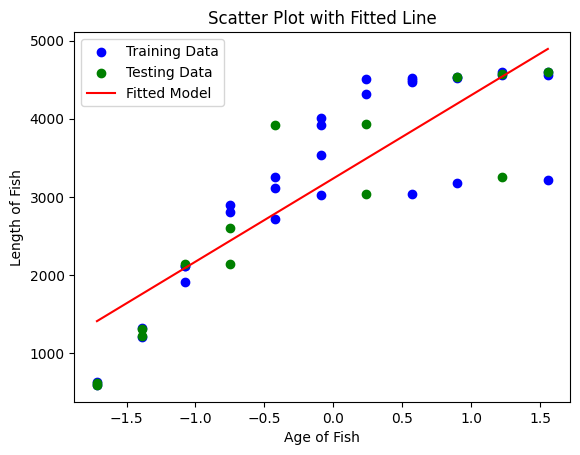

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the scatter plot for train and test set
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.scatter(X_test, y_test, label='Testing Data', color='green')

# Plot the line representing the fitted model
x = np.linspace(min(X_train), max(X_train), 100)  # Generate x values for the line plot
y_model = theta_gd[0] + theta_gd[1] * x # Generate y values based on the fitted model
plt.plot(x, y_model, color='red', label='Fitted Model')

plt.xlabel('Age of Fish')
plt.ylabel('Length of Fish')
plt.title('Scatter Plot with Fitted Line') # Set the title\
plt.legend() # Display the legend
plt.show()


The plot shows a scatter plot comprising two sets of data points: the training data (blue) and the testing data (green). The x-axis represents the age of fish, while the y-axis represents the length of fish. The red line represents the fitted model, which is constructed using the training data. The plot visually illustrates how the model captures the relationship between the age and length of fish, specifically based on the training dataset.

## Evaluation

Evaluation of a linear regression model is essential to assess its performance in predicting the target variable accurately. In this section, we will discuss the evaluation process, starting with the calculation of predicted values and subsequently measuring the Root Mean Squared Error (RMSE) as a metric of model accuracy.

Once we have the predicted values, we calculate the RMSE to quantify the average difference between the predicted values and the actual target variable values. The RMSE serves as a measure of the model's accuracy, taking into account both the magnitude and direction of the prediction errors. A lower RMSE value indicates a better fit of the model to the data, with smaller prediction errors on average.

### Evaluation Functions

The 'predict' function takes input features X_test and model parameters theta and returns the predicted output values using linear regression. It adds a bias column of ones to the input features, performs matrix multiplication between the modified input features and the parameters, and returns the predicted values.

In [11]:
import numpy as np

def predict(X_test, theta):
  # Add a bias column of ones to the input features
  X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

  # Compute the predicted output using the model parameters
  y_pred = X_test @ theta

  return y_pred

The following function computes the root mean squared error (RMSE) between the true target variable and the predicted target variable. It first computes the mean squared error (MSE) between the two variables, which is the average of the squared differences between the true and predicted values. Then, it computes the RMSE by taking the square root of the MSE.

In [12]:
import numpy as np

def compute_rmse(y_true, y_pred):
    # Compute the root mean squared error (RMSE) between the true target variable and the predicted target variable
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)

    return rmse

The plot_train_rmse function takes in a list of train RMSE (Root Mean Squared Error) values as train_rmse. It then generates a line plot to visualize the change in train RMSE values over the course of iterations during gradient descent. The x-axis represents the number of iterations, while the y-axis represents the train RMSE. The resulting plot is displayed, providing a visual representation of the training RMSE trends during the gradient descent process.

In [13]:
import matplotlib.pyplot as plt

def plot_train_rmse(train_rmse):
    # Plot the train_rmse values against the number of iterations
    plt.plot(range(len(train_rmse)), train_rmse)
    plt.xlabel('Number of iterations')
    plt.ylabel('Train RMSE')
    plt.title('Training RMSE during Gradient Descent')
    plt.show()

### Run Evaluation Functions

In [14]:
# Generate predictions for the test data using the trained model
y_pred = predict(X_test, theta_gd)

# Compute the Root Mean Squared Error (RMSE) between the true target variable and the predicted target variable
test_final_rmse = compute_rmse(y_test, y_pred)

# Print the computed RMSE as a measure of the model's performance on the test data
print("test_final_rmse:", test_final_rmse)


test_final_rmse: 624.471067756397


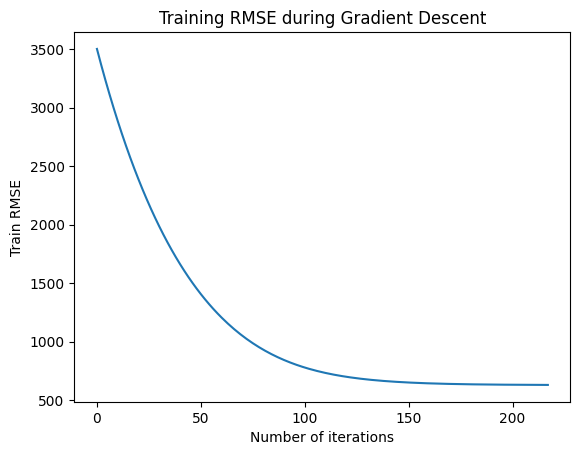

In [15]:
# Plot the training RMSE values against the number of iterations to visualize the model's performance during training
plot_train_rmse(train_rmse)

The above plot shows the train_rmse values plotted against the number of iterations. The x-axis represents the number of iterations, while the y-axis represents the train RMSE. The purpose of this plot is to analyze the performance of the gradient descent algorithm over multiple iterations in terms of the train RMSE. It allows us to observe how the train RMSE changes as the algorithm progresses. It is important to note that if the plot shows that the train RMSE doesn't improve after 200 iterations, it suggests that the algorithm may have reached a point of convergence or that further iterations are not leading to significant improvements in the model's performance.

## Linear Regression using scikit-learn

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# File path
file_path = 'data/x06Simple.csv'

# Load the data
X, y = load_data(file_path)

# Randomize and split the data into training and testing sets
X_train, y_train, X_test, y_test = split_data(X, y, seed=0, train_size=2/3)

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Standardize the input features using the training set
X_train, X_test = standardize(X_train, X_test)

# # Standardize the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Print the learned parameters
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print('RMSE:', rmse)


Intercept: 3275.6666666666665
Coefficients: [1081.62594644]
RMSE: 634.8584956468054


In conclusion, this article has explored two popular methods for estimating the parameters of a linear regression model: the closed-form solution and the gradient descent algorithm. We have provided code implementations in Python for both methods and demonstrated their application on an example dataset. Through these implementations, we have gained insights into the process of fitting a linear regression model and understanding the impact of independent variables on the target variable. Additionally, we have discussed the scikit-learn library, which offers powerful tools and functionality for linear regression analysis.

I hope that this article has been helpful in understanding linear regression. For more information on linear regression and gradient descent, please refer to the following resources:

https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html